# Stats 131 Final Project

## Project Overview

In the National Football League (NFL), a franchise's starting quarterback is often considered the most important position and player on the team. A quarterback in the NFL is tasked with directing the offense and being an extension of the coaching staff whom call plays for the quarterback relay to his team. Because of their critical importance to their team, a quarterback is often the highest paid player on his respective team. There is a narrative in the NFL that a team cannot excel without good quarterback. With that said, our project aims to using Principal Component Analysis and K-Means Clustering to see whether or not we can separate quarterbacks into distinct tiers or clusters to see whether or not we can see what makes up an elite quarterback in the NFL.

## Background Information
### General Structure of NFL
The National Football League (NFL) is an American professional football league that consists of 32 teams where 16 teams are part of the National Football Conference (NFC) and the other 16 teams are part of the American Football Conference (AFC). In addition to  being separated into 2 distinct conferences, the teams within a conference are also divided into 4 divisions. The divisions are the following:

##### American Football Conference (AFC)
- AFC East
    - New England Patriots (NWE)
    - Miami Dolphins (MIA)
    - Buffalo Bills (BUF)
    - New York Jets (NYJ)
- AFC West
    - Kansas City Chiefs (KAN)
    - Los Angeles Chargers (LAC)
    - Denver Broncos (DEN)
    - Oakland Raiders (OAK)
- AFC North
    - Pittsburgh Steelers (PIT)
    - Baltimore Ravens (BAL)
    - Cincinnati Bengals (CIN)
    - Cleveland Browns (CLE)
- AFC South
    - Houston Texans (HOU)
    - Indianapolis Colts (IND)
    - Tennessee Titans (TEN)
    - Jacksonville Jaguars (JAX)

<br>

##### National Football Conference (NFC)
- NFC East
    - Dallas Cowboys (DAL)
    - Philadelphia Eagles (PHI)
    - Washington Redskins (WAS)
    - New York Giants (NYG)
- NFC West
    - Los Angeles Rams (LAR)
    - Seattle Seahawks (SEA)
    - Arizona Cardinals (ARI)
    - San Francisco 49ers (SFO)
- NFC North
    - Chicago Bears (CHI)
    - Minnesota Vikings (MIN)
    - Green Bay Packers (GNB)
    - Detroit Lions (DET)
- NFC South
    - New Orleans Saints (NOR)
    - Carolina Panthers (CAR)
    - Tampa Bay Buccaneers (TAM)
    - Atlanta Falcons (ATL)


### Structure of NFL season

#### Regular Season
The NFL season consists of 17 weeks with 16 games played from August to December with an additional postseason playoffs for qualified teams. Each team plays has a designated BYE week where the team does not play and is allowed an additional week of rest. All NFL games are played on Sundays with the exception of 2 games each week: one of which is played on Thursday and the other being played on Monday. 

There are considered to be 3 "marquee" games that are played each week: 

- <i>Thursday Night Football</i>
- <i>Sunday Night Football</i>
- <i>Monday Night Football</i>

Thanksgiving week is the one exception to the week to week game schedule structure that the NFL follows. On Thanksgiving, instead of playing one game on <i>Thursday Night Football</i>, three games are played on three different timeslots on Thanksgiving.  

#### Postseason/Playoffs
Teams must qualify in order to make the postseason of the NFL. Six teams from each conference are will qualify for the playoffs, the division winner from each division and 2 wildcard spots from each conference. The two wildcard teams from each conference are teams two best teams from each conference excluding the division winners. 

### NFL Rosters
A current NFL roster consists of 53 active players, meaning players who are healthy and a part of the team's roster on each Sunday. 

## Data Cleaning/Preparation

### Loading necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Rank is based on Passing Attempts

### Reading in QB Passing and Rushing Data

In [5]:
nfl_data = {}
rush_filter = ['Player','Rushing Att','Rushing Yds','Rushing TD']
#rush_type = {'Rushing Att' : np.float64, 'Rushing Yds': np.float64,'Rushing TD': np.float64,'Rushing Lng': np.float64}

In [6]:
#Testing reading in data
#nfl_rr = pd.read_csv('../src/Data/nfl-2017-rr.csv')
#nfl_rr[rush_filter]

In [7]:
pro_bowl = {2014 : ['Cam Newton', 'Nick Foles', 'Andrew Luck', 'Drew Brees', 'Alex Smith', 'Philip Rivers',
                   'Russell Wilson', 'Tom Brady', 'Peyton Manning'],
            2015 : ['Drew Brees', 'Andrew Luck', 'Andy Dalton', 'Matt Ryan', 'Tony Romo', 'Matthew Stafford',
                   'Ben Roethlisberger', 'Tom Brady', 'Aaron Rodgers', 'Peyton Manning'],
            2016 : ['Derek Carr', 'Eli Manning', 'Tyrod Taylor', 'Teddy Bridgewater', 'Russell Wilson',
                   'Jameis Winston', 'Tom Brady', 'Cam Newton', 'Aaron Rodgers', 'Carson Palmer', 
                   'Ben Roethlisberger'],
            2017 : ['Tom Brady', 'Derek Carr', 'Ben Roethlisberger', 'Alex Smith', 'Andy Dalton', 'Philip Rivers',
                   'Matt Ryan', 'Dak Prescott', 'Aaron Rodgers', 'Kirk Cousins', 'Drew Brees'],
            2018 : ['Tom Brady', 'Ben Roethlisberger', 'Philip Rivers', 'Alex Smith', 'Derek Carr',
                   'Carson Wentz', 'Russell Wilson', 'Drew Brees', 'Jared Goff']}

In [8]:
def add_pro_bowl(data, year):
    if data.Player in pro_bowl[year]:
        return 1
    else:
        return 0

In [9]:
for i in range(2013,2018):
    nfl = pd.read_csv('../src/Data/nfl-{}.csv'.format(i))
    nfl_rr = pd.read_csv('../src/Data/nfl-{}-rr.csv'.format(i))
    nfl_rr = nfl_rr[rush_filter]
    nfl['Year'] = i
    nfl['Pro_Bowl'] = nfl.apply(add_pro_bowl, axis = 1, year = i + 1)
    nfl_full = nfl.merge(nfl_rr, on = 'Player', how = 'left')
    nfl_full.set_index(['Year', 'Player'], inplace = True)
    nfl_data[i] = nfl_full

In [10]:
nfl_data[2013].info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 85 entries, (2013, Peyton Manning) to (2013, Brad Smith)
Data columns (total 33 columns):
Rk             85 non-null int64
Tm             85 non-null object
Age            85 non-null int64
Pos            66 non-null object
G              85 non-null int64
GS             85 non-null int64
QBrec          51 non-null object
Cmp            85 non-null int64
Att            85 non-null int64
Cmp%           85 non-null float64
Yds            85 non-null int64
TD             85 non-null int64
TD%            85 non-null float64
Int            85 non-null int64
Int%           85 non-null float64
Lng            85 non-null int64
Y/A            85 non-null float64
AY/A           85 non-null float64
Y/C            75 non-null float64
Y/G            85 non-null float64
Rate           85 non-null float64
QBR            73 non-null float64
Sk             85 non-null int64
Yds2           85 non-null int64
NY/A           85 non-null float64
ANY/A       

In [11]:
nfl = nfl_data[2013]
for i in range(2014,2018):
    nfl = pd.concat([nfl, nfl_data[i]])

In [12]:
nfl.Pos.astype('category').cat.categories

Index(['FB/rb', 'FS', 'K', 'LCB', 'NT', 'P', 'P/WR', 'QB', 'QB/wr', 'RB', 'TE',
       'WR', 'fb/wr', 'fs', 'mlb', 'qb', 'rb', 'rb/wr', 'wr'],
      dtype='object')

### Filtering to only be Quarterbacks

In [13]:
def qb_fix(data):
    if data.Pos == 'QB/WR' or data.Pos == 'qb' or data.Pos == 'qb/wr' or data.Pos == 'QB':
        return 'QB'

In [14]:
nfl.Pos = nfl.apply(qb_fix, axis = 1)

In [15]:
qb = nfl[nfl.Pos == 'QB']

### Adding Conference and Division Variable

In [16]:
conference = {'AFC' : ['NWE', 'BUF', 'NYJ', 'MIA', 'KAN', 'LAC', 'SDG', 'DEN', 'OAK', 
                       'PIT', 'BAL', 'CIN' 'CLE', 'HOU', 'IND', 'TEN', 'JAX'],
              'NFC' : ['DAL', 'PHI', 'WAS', 'NYG', 'STL', 'LAR', 'SEA', 'ARI', 'SFO', 
                       'CHI', 'MIN', 'GNB', 'DET', 'NOR', 'CAR', 'TAM', 'ATL'],
              'Other' : ['3TM', '2TM']}

division = {'AFC East' : ['NWE', 'BUF', 'NYJ', 'MIA'],
           'AFC West' : ['KAN', 'LAC', 'SDG', 'DEN', 'OAK'],
           'AFC North' : ['PIT', 'BAL', 'CIN' 'CLE'],
           'AFC South' : ['HOU', 'IND', 'TEN', 'JAX'],
           'NFC East' : ['DAL', 'PHI', 'WAS', 'NYG'],
           'NFC West' : ['STL', 'LAR', 'SEA', 'ARI', 'SFO'],
           'NFC North' : ['CHI', 'MIN', 'GNB', 'DET'],
           'NFC South' : ['NOR', 'CAR', 'TAM', 'ATL'],
           'Other' : ['3TM', '2TM']}

In [17]:
def division_set(data):
    if data.Tm in conference['AFC']:
        if data.Tm in division['AFC East']:
            return 'AFC East'
        elif data.Tm in division['AFC West']:
            return 'AFC West'
        elif data.Tm in division['AFC North']:
            return 'AFC North'
        elif data.Tm in division['AFC South']:
            return 'AFC South'
        
    elif data.Tm in conference['NFC']:
        if data.Tm in division['NFC East']:
            return 'NFC East'
        elif data.Tm in division['NFC West']:
            return 'NFC West'
        elif data.Tm in division['NFC North']:
            return 'NFC North'
        elif data.Tm in division['NFC South']:
            return 'NFC South'
    else:
        return 'Other'

In [18]:
qb['Division'] = qb.apply(division_set, axis = 1)

In [19]:
qb['Conference'] = qb.Division.str[0:3]

### Creating Wins, Losses, and Win Percentage

In [20]:
def win_loss(data, i):
    return int(data.QBrec.rsplit('-')[i])

In [21]:
qb['wins'] = qb.apply(win_loss, i = 0, axis = 1)
qb['losses'] = qb.apply(win_loss, i = 1, axis = 1)
qb['ties'] = qb.apply(win_loss, i = 2, axis = 1)

In [41]:
qb['win%'] = (qb.wins/(qb.wins + qb.losses + qb.ties))*100

### Correcting the variable types

In [22]:
qb.QBrec.astype('category').cat.categories

Index(['0-1-0', '0-1-1', '0-15-0', '0-2-0', '0-3-0', '0-4-0', '0-5-0', '0-6-0',
       '0-7-0', '0-8-0', '1-0-0', '1-1-0', '1-10-0', '1-2-0', '1-3-0', '1-4-0',
       '1-5-0', '1-6-0', '1-7-0', '10-3-0', '10-4-0', '10-5-1', '10-6-0',
       '11-1-0', '11-2-0', '11-3-0', '11-4-0', '11-5-0', '12-3-0', '12-4-0',
       '13-3-0', '15-1-0', '2-0-0', '2-1-0', '2-2-0', '2-3-0', '2-4-0',
       '2-5-0', '2-6-0', '2-6-1', '3-0-0', '3-1-0', '3-10-0', '3-12-0',
       '3-13-0', '3-2-0', '3-3-0', '3-4-0', '3-5-0', '3-6-0', '3-7-0', '3-8-0',
       '3-9-0', '4-11-0', '4-12-0', '4-3-0', '4-4-0', '4-5-0', '4-6-0',
       '4-7-0', '4-8-0', '4-9-0', '5-0-0', '5-10-0', '5-11-0', '5-2-0',
       '5-3-0', '5-4-0', '5-5-0', '5-6-0', '5-8-0', '5-8-1', '6-0-0', '6-10-0',
       '6-2-0', '6-3-0', '6-6-0', '6-8-0', '6-8-1', '6-9-0', '6-9-1', '7-2-0',
       '7-4-0', '7-5-0', '7-6-0', '7-7-0', '7-8-0', '7-9-0', '8-2-0', '8-5-0',
       '8-6-0', '8-7-0', '8-7-1', '8-8-0', '9-6-0', '9-7-0'],
      dtype='object')

In [23]:
object_types = ['Rushing Att', 'Rushing Yds', 'Rushing TD']

for i in object_types:
    qb[i] = qb[i].astype('float64') 

In [24]:
qb.head(10)

Rk   Tm  Age Pos   G  GS   QBrec  Cmp  Att  Cmp%  \
Year Player                                                                 
2013 Peyton Manning       1  DEN   37  QB  16  16  13-3-0  450  659  68.3   
     Matt Ryan            2  ATL   28  QB  16  16  4-12-0  439  651  67.4   
     Drew Brees           3  NOR   34  QB  16  16  11-5-0  446  650  68.6   
     Matthew Stafford     4  DET   25  QB  16  16   7-9-0  371  634  58.5   
     Tom Brady            5  NWE   36  QB  16  16  12-4-0  380  628  60.5   
     Joe Flacco           6  BAL   28  QB  16  16   8-8-0  362  614  59.0   
     Ryan Tannehill       7  MIA   25  QB  16  16   8-8-0  355  588  60.4   
     Andy Dalton          8  CIN   26  QB  16  16  11-5-0  363  586  61.9   
     Ben Roethlisberger   9  PIT   31  QB  16  16   8-8-0  375  584  64.2   
     Carson Palmer       10  ARI   34  QB  16  16  10-6-0  362  572  63.3   

                         ...   GWD  Pro_Bowl  Rushing Att  Rushing Yds  \
Year Player              ...                                             
2013 Peyton Manning      ...   2.0         1         32.0        -31.0   
     Matt Ryan           ...   1.0         0         17.0         55.0   
     Drew Brees          ...   2.0         1         35.0         52.0   
     Matthew Stafford    ...   3.0         0         37.0         69.0   
     Tom Brady           ...   5.0         1         32.0         18.0   
     Joe Flacco          ...   4.0         0         27.0        131.0   
     Ryan Tannehill      ...   3.0         0         40.0        238.0   
     Andy Dalton         ...   3.0         0         61.0        183.0   
     Ben Roethlisberger  ...   3.0         0         27.0         99.0   
     Carson Palmer       ...   4.0         0         27.0          3.0   

                         Rushing TD   Division  Conference  wins  losses  ties  
Year Player                                                                     
2013 Peyton Manning             1.0   AFC West         AFC    13       3     0  
     Matt Ryan                  0.0  NFC South         NFC     4      12     0  
     Drew Brees                 3.0  NFC South         NFC    11       5     0  
     Matthew Stafford           2.0  NFC North         NFC     7       9     0  
     Tom Brady                  0.0   AFC East         AFC    12       4     0  
     Joe Flacco                 1.0  AFC North         AFC     8       8     0  
     Ryan Tannehill             1.0   AFC East         AFC     8       8     0  
     Andy Dalton                2.0      Other         Oth    11       5     0  
     Ben Roethlisberger         1.0  AFC North         AFC     8       8     0  
     Carson Palmer              0.0   NFC West         NFC    10       6     0  

[10 rows x 38 columns]

In [25]:
qb.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 258 entries, (2013, Peyton Manning) to (2017, Scott Tolzien)
Data columns (total 38 columns):
Rk             258 non-null int64
Tm             258 non-null object
Age            258 non-null int64
Pos            258 non-null object
G              258 non-null int64
GS             258 non-null int64
QBrec          258 non-null object
Cmp            258 non-null int64
Att            258 non-null int64
Cmp%           258 non-null float64
Yds            258 non-null int64
TD             258 non-null int64
TD%            258 non-null float64
Int            258 non-null int64
Int%           258 non-null float64
Lng            258 non-null int64
Y/A            258 non-null float64
AY/A           258 non-null float64
Y/C            258 non-null float64
Y/G            258 non-null float64
Rate           258 non-null float64
QBR            257 non-null float64
Sk             258 non-null int64
Yds2           258 non-null int64
NY/A           258 

In [26]:
qb.fillna(0, inplace = True)

In [27]:
qb_ready = qb.drop(['Rk', 'Tm', 'Pos', 'QBrec', 'Division', 'Conference'], axis = 1)

In [28]:
qb_ready.head(10)

Age   G  GS  Cmp  Att  Cmp%   Yds  TD  TD%  Int  \
Year Player                                                                
2013 Peyton Manning       37  16  16  450  659  68.3  5477  55  8.3   10   
     Matt Ryan            28  16  16  439  651  67.4  4515  26  4.0   17   
     Drew Brees           34  16  16  446  650  68.6  5162  39  6.0   12   
     Matthew Stafford     25  16  16  371  634  58.5  4650  29  4.6   19   
     Tom Brady            36  16  16  380  628  60.5  4343  25  4.0   11   
     Joe Flacco           28  16  16  362  614  59.0  3912  19  3.1   22   
     Ryan Tannehill       25  16  16  355  588  60.4  3913  24  4.1   17   
     Andy Dalton          26  16  16  363  586  61.9  4293  33  5.6   20   
     Ben Roethlisberger   31  16  16  375  584  64.2  4261  28  4.8   14   
     Carson Palmer        34  16  16  362  572  63.3  4274  24  4.2   22   

                         ...   Sk%  4QC  GWD  Pro_Bowl  Rushing Att  \
Year Player              ...                                          
2013 Peyton Manning      ...   2.7  2.0  2.0         1         32.0   
     Matt Ryan           ...   6.3  1.0  1.0         0         17.0   
     Drew Brees          ...   5.4  2.0  2.0         1         35.0   
     Matthew Stafford    ...   3.5  2.0  3.0         0         37.0   
     Tom Brady           ...   6.0  5.0  5.0         1         32.0   
     Joe Flacco          ...   7.3  2.0  4.0         0         27.0   
     Ryan Tannehill      ...   9.0  4.0  3.0         0         40.0   
     Andy Dalton         ...   4.7  0.0  3.0         0         61.0   
     Ben Roethlisberger  ...   6.7  1.0  3.0         0         27.0   
     Carson Palmer       ...   6.7  3.0  4.0         0         27.0   

                         Rushing Yds  Rushing TD  wins  losses  ties  
Year Player                                                           
2013 Peyton Manning            -31.0         1.0    13       3     0  
     Matt Ryan                  55.0         0.0     4      12     0  
     Drew Brees                 52.0         3.0    11       5     0  
     Matthew Stafford           69.0         2.0     7       9     0  
     Tom Brady                  18.0         0.0    12       4     0  
     Joe Flacco                131.0         1.0     8       8     0  
     Ryan Tannehill            238.0         1.0     8       8     0  
     Andy Dalton               183.0         2.0    11       5     0  
     Ben Roethlisberger         99.0         1.0     8       8     0  
     Carson Palmer               3.0         0.0    10       6     0  

[10 rows x 32 columns]

In [29]:
qb_ready.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 258 entries, (2013, Peyton Manning) to (2017, Scott Tolzien)
Data columns (total 32 columns):
Age            258 non-null int64
G              258 non-null int64
GS             258 non-null int64
Cmp            258 non-null int64
Att            258 non-null int64
Cmp%           258 non-null float64
Yds            258 non-null int64
TD             258 non-null int64
TD%            258 non-null float64
Int            258 non-null int64
Int%           258 non-null float64
Lng            258 non-null int64
Y/A            258 non-null float64
AY/A           258 non-null float64
Y/C            258 non-null float64
Y/G            258 non-null float64
Rate           258 non-null float64
QBR            258 non-null float64
Sk             258 non-null int64
Yds2           258 non-null int64
NY/A           258 non-null float64
ANY/A          258 non-null float64
Sk%            258 non-null float64
4QC            258 non-null float64
GWD           

## Prep data from Sci-Kit Learn Implementation

### Splitting into Training and Testing Data

In [30]:
train, test = train_test_split(qb_ready, test_size = 0.25, random_state = 123)

### Standardizing Data

In [31]:
scaler = StandardScaler()
scaler.fit(train)

train_stan = scaler.transform(train) 
test_stan = scaler.transform(test)

### PCA Dimension Determination

Text(0, 0.5, 'cumulative explained variance')

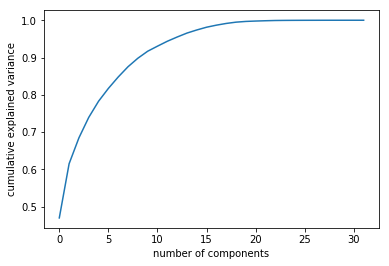

In [32]:
pca_fit = PCA().fit(train_stan)
plt.plot(np.cumsum(pca_fit.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

### Using PCA to for dimension reduction

In [33]:
pca = PCA(n_components = 10)

In [34]:
clusters = {}

In [35]:
for i in range(2,8):
    kmeans = KMeans(n_clusters = i)
    steps = [('PCA', pca), ('KMeans', kmeans)]
    pipeline = Pipeline(steps)
    pipeline.fit(train_stan)
    clusters[i] = kmeans.labels_

### Visualizing the clustering

In [36]:
pca_visual = PCA(n_components = 2)
projected_values = pca_visual.fit_transform(train_stan)
projected_values.shape

(193, 2)

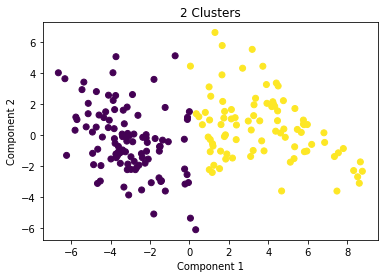

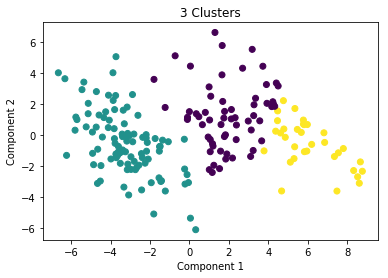

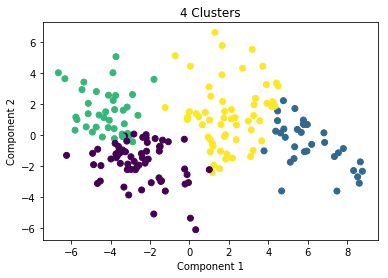

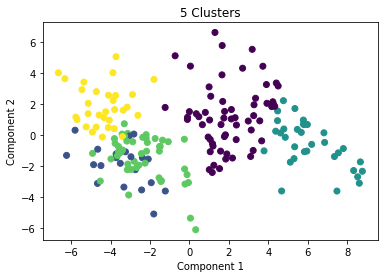

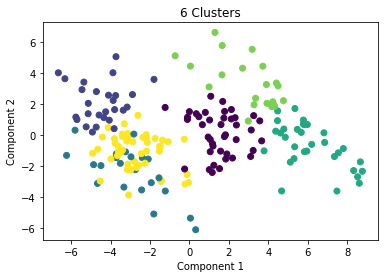

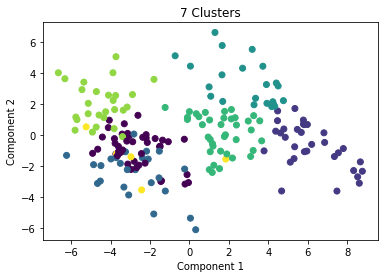

In [37]:
for i in range(2,8):
    plt.scatter(projected_values[:,0], projected_values[:,1],
               alpha = 1, c = clusters[i])
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.title('{} Clusters'.format(i))
    plt.show()